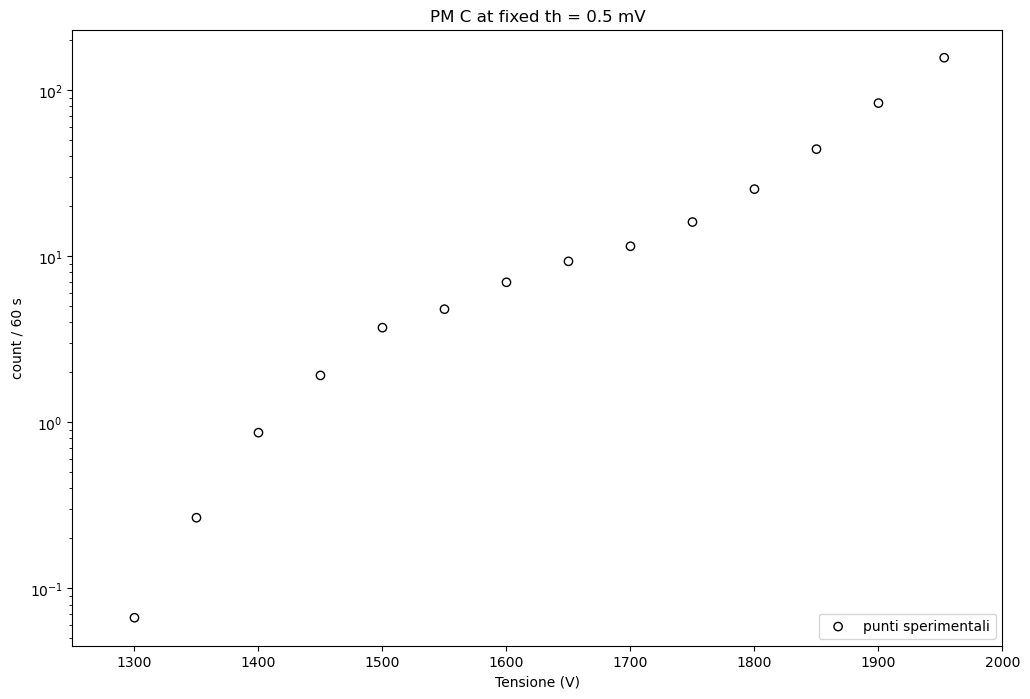

In [1]:
# Importo le librerie utili
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Definisco la funzione per plottare
def Plateaux_plot(tensione, count_rate, xlim):
  '''
  Questa funzione serve per fare il plot dei dati sperimentali

  Parametri:
  - tensione: lista di valori di tensione
  - count_rate: lista di valori di conteggi / tempo di acquisizione
  - xlim: lista di due valori con i limiti da settare sull'asse delle x
  '''
  fig, ax = plt.subplots(figsize=(12, 8))
  ax.scatter(tensione, count_rate, marker='o', color='black', facecolor='none', label='punti sperimentali')
  ax.set(title='PM C at fixed th = 0.5 mV', xlabel = 'Tensione (V)', ylabel= 'count / 60 s',
         yscale='log', xlim=xlim)
  # ax.grid()
  ax.legend(loc='lower right')
  plt.show()

# Prendo i dati sperimentali
tensione = [1000, 1100, 1200, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1953]
conteggi = [0, 0, 0, 4, 16, 52, 115, 223, 288, 418, 559, 689, 964, 1521, 2648, 5012, 9401]

# Definisco il tempo di "acquisizione" dei conteggi
tempo = 60

# Divido i conteggi per il tempo di acquisizione in modo tale da avere il rate di conteggi
count_rate = [v/tempo for v in conteggi]

# Utilizzo la funzione che ho definito sopra per plottare i dati
Plateaux_plot(tensione=tensione, count_rate=count_rate, xlim=[1250, 2000])

# Salvo i dati in csv
dataset = pd.DataFrame({'tensione': tensione, 'count_rate': count_rate})
dataset.to_csv('CRate_Tensione__PM_C__th_50mV.csv')

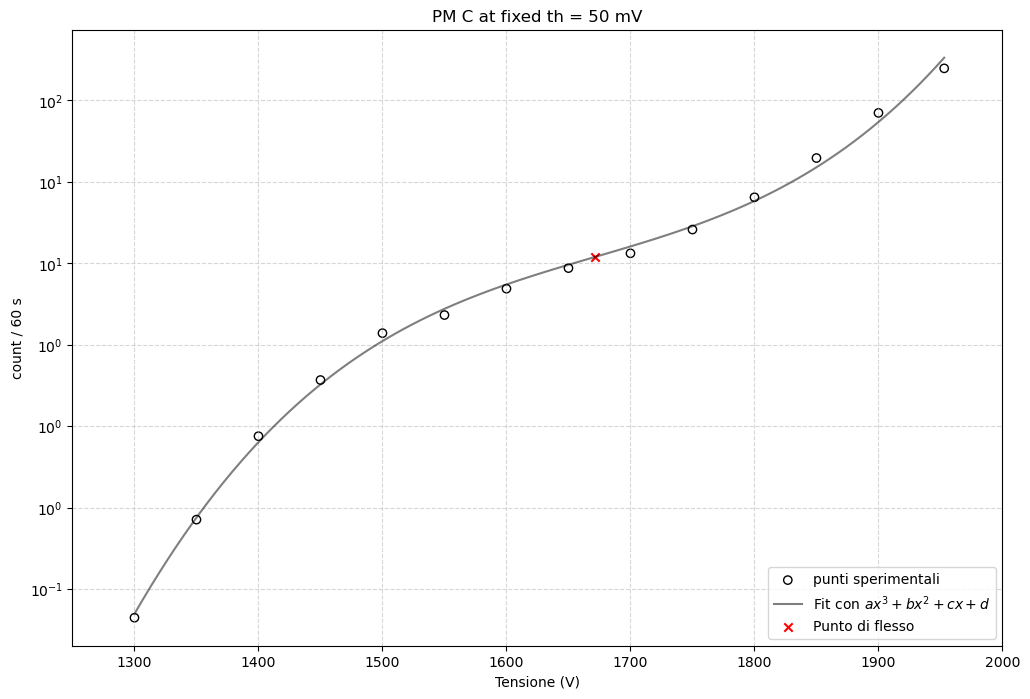

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from moduli import calcolo_flessi, Plateaux_plot

# Definisco la funzione da fittare
def function(x, a, b, c, d):        
    return a * x**3 + b *x**2 + c * x + d
 
# Carico i dati
dataset = pd.read_csv('CRate_Tensione__PM_C__th_50mV.csv')

# Definisco i dati
xdata = dataset['tensione'][3:]
ydata = dataset['count_rate'][3:]

# rescaling to log10
ydata = np.log10(ydata)

# Fitting
popt, pcov = curve_fit(function, xdata, ydata)

# Calcolo i punti di flesso
flesso = calcolo_flessi(popt)

# Plotto i dati
Plateaux_plot(x=xdata, y=ydata, popt=popt, function=function, flesso=flesso, 
              plot_settings = { 'title': 'PM C at fixed th = 50 mV',
                                'xlabel': 'Tensione di Alimentazione (V)',
                                'ylabel': 'count / 60 s', 
                                'xlim': [1250, 2000] })

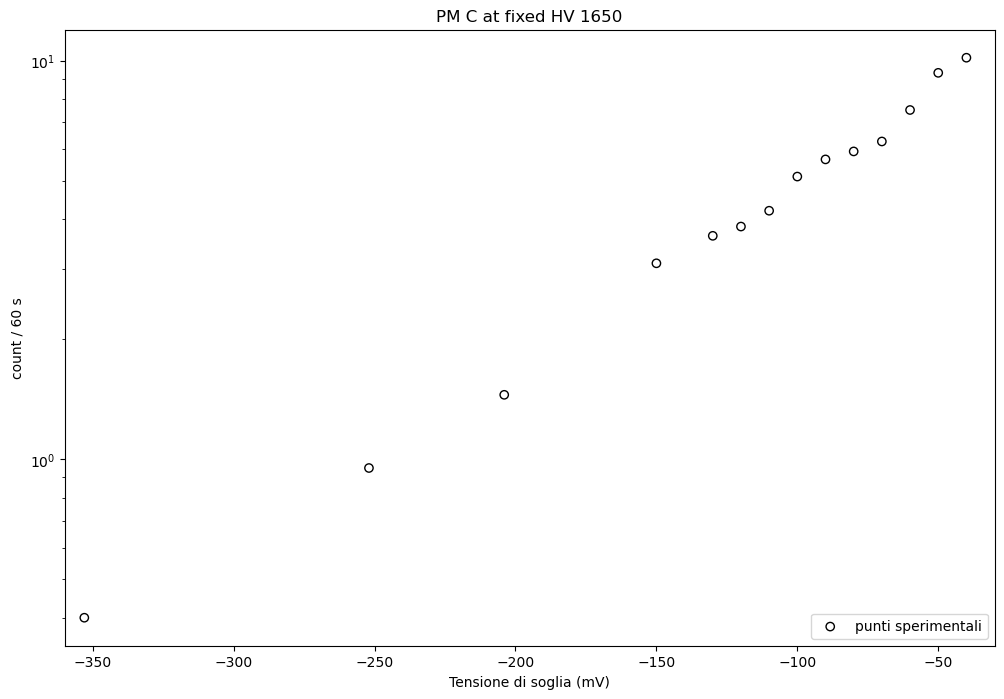

In [2]:
# Importo le librerie utili
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Definisco la funzione per plottare
def Plateaux_plot(tensione, count_rate, xlim):
  '''
  Questa funzione serve per fare il plot dei dati sperimentali

  Parametri:
  - tensione: lista di valori di tensione di soglia
  - count_rate: lista di valori di conteggi / tempo di acquisizione
  - xlim: lista di due valori con i limiti da settare sull'asse delle x
  '''
  fig, ax = plt.subplots(figsize=(12, 8))
  ax.scatter(tensione, count_rate, marker='o', color='black', facecolor='none', label='punti sperimentali')
  ax.set(title='PM C at fixed HV 1650', xlabel = 'Tensione di soglia (mV)', ylabel= 'count / 60 s',
         yscale='log', xlim=xlim)
  # ax.grid()
  ax.legend(loc='lower right')
  plt.show()

# Prendo i dati sperimentali
soglia = [-353, -252, -204, -150, -130, -120, -110, -100, -90, -80, -70, -60, -50, -40]
conteggi = [24, 57, 87, 186, 218, 230, 252, 307, 339, 355, 376, 451, 559, 610]

# Definisco il tempo di "acquisizione" dei conteggi
tempo = 60

# Divido i conteggi per il tempo di acquisizione in modo tale da avere il rate di conteggi
count_rate = [c / tempo for c in conteggi]

# Utilizzo la funzione che ho definito sopra per plottare i dati
Plateaux_plot(soglia, count_rate, xlim=[-360, -30])

# Salvo i dati in csv
dataset = pd.DataFrame({'tensione': soglia, 'count_rate': count_rate})
dataset.to_csv('CRate_Soglia__PM_C__HV_1650V.csv')

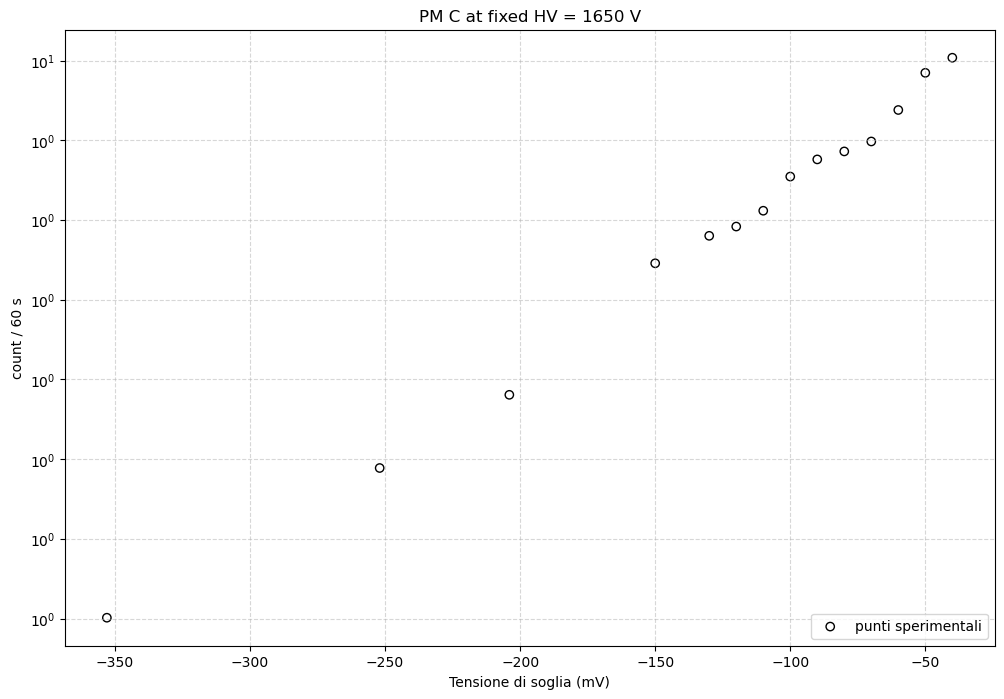

In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from moduli import calcolo_flessi, Plateaux_plot

# Definisco la funzione da fittare
def function(x, a, b, c, d):        
    return a * x**3 + b *x**2 + c * x + d
 
# Carico i dati
dataset = pd.read_csv('CRate_Soglia__PM_C__HV_1650V.csv')

# Definisco i dati
xdata = dataset['tensione']
ydata = dataset['count_rate']

# rescaling to log10
ydata = np.log10(ydata)

# Plotto i dati
Plateaux_plot(x=xdata, y=ydata, bool_fit=False, bool_flesso=False, 
              plot_settings = { 'title': 'PM C at fixed HV = 1650 V',
                                'xlabel': 'Tensione di soglia (mV)',
                                'ylabel': 'count / 60 s' })

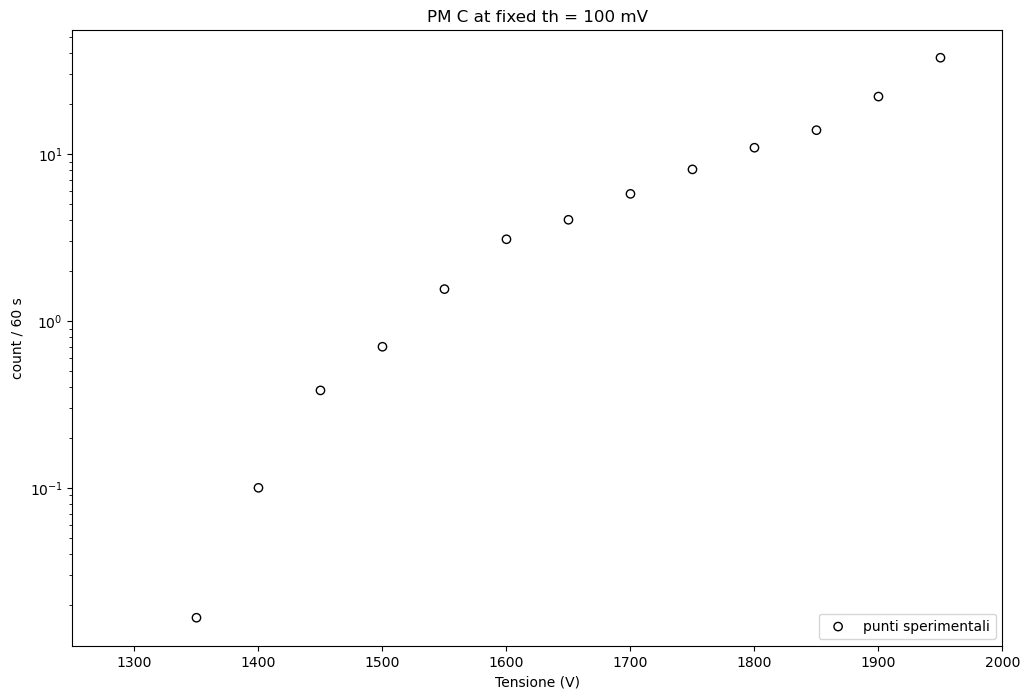

In [10]:
# Importo le librerie utili
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Definisco la funzione per plottare
def Plateaux_plot(tensione, count_rate, xlim):
  '''
  Questa funzione serve per fare il plot dei dati sperimentali

  Parametri:
  - tensione: lista di valori di tensione
  - count_rate: lista di valori di conteggi / tempo di acquisizione
  - xlim: lista di due valori con i limiti da settare sull'asse delle x
  '''
  fig, ax = plt.subplots(figsize=(12, 8))
  ax.scatter(tensione, count_rate, marker='o', color='black', facecolor='none', label='punti sperimentali')
  ax.set(title='PM C at fixed th = 100 mV', xlabel = 'Tensione (V)', ylabel= 'count / 60 s',
         yscale='log', xlim=xlim)
  # ax.grid()
  ax.legend(loc='lower right')
  plt.show()

# Prendo i dati sperimentali
tensione = [1000, 1100, 1200, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950]
conteggi = [0, 0, 0, 0, 1, 6, 23, 42, 93, 185, 242, 346, 485, 654, 833, 1324, 2263] # 1600 in dubbio

# Definisco il tempo di "acquisizione" dei conteggi
tempo = 60

# Divido i conteggi per il tempo di acquisizione in modo tale da avere il rate di conteggi
count_rate = [v/tempo for v in conteggi]

# Utilizzo la funzione che ho definito sopra per plottare i dati
Plateaux_plot(tensione=tensione, count_rate=count_rate, xlim=[1250, 2000])

# Salvo i dati in csv
dataset = pd.DataFrame({'tensione': tensione, 'count_rate': count_rate})
dataset.to_csv('CRate_Tensione__PM_C__th_100mV.csv')

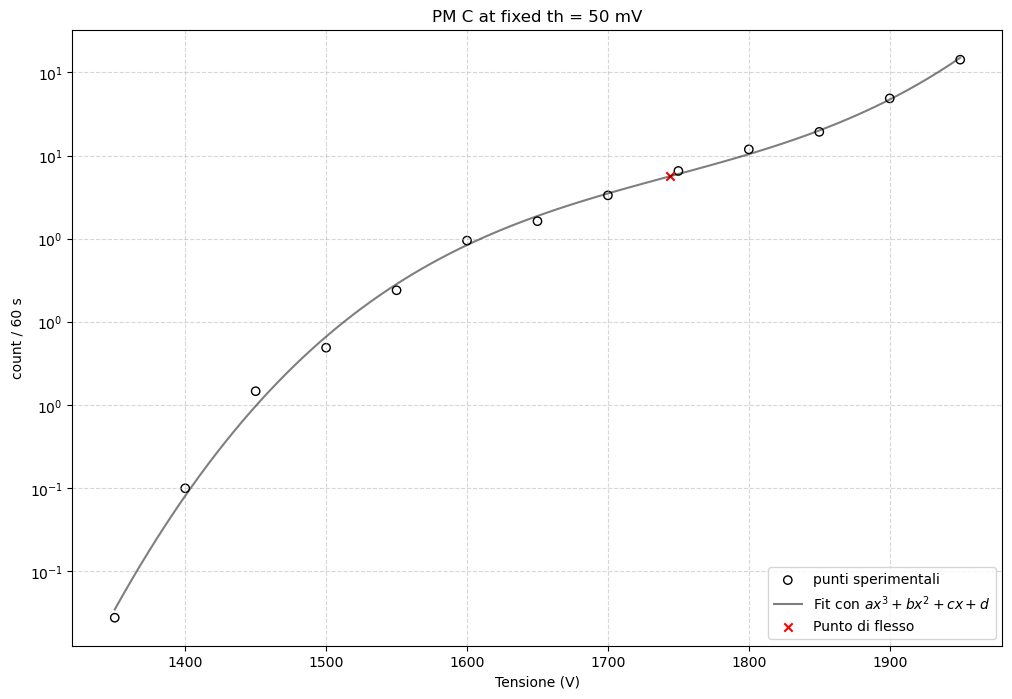

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from moduli import calcolo_flessi, Plateaux_plot

# Definisco la funzione da fittare
def function(x, a, b, c, d):        
    return a * x**3 + b *x**2 + c * x + d
 
# Carico i dati
dataset = pd.read_csv('CRate_Tensione__PM_C__th_100mV.csv')

# Definisco i dati
xdata = dataset['tensione'][4:]
ydata = dataset['count_rate'][4:]

# rescaling to log10
ydata = np.log10(ydata)

# Fitting
popt, pcov = curve_fit(function, xdata, ydata)

# Calcolo i punti di flesso
flesso = calcolo_flessi(popt)

# Plotto i dati
Plateaux_plot(x=xdata, y=ydata, popt=popt, function=function, flesso=flesso, 
              plot_settings = { 'title': 'PM C at fixed th = 100 mV',
                                'xlabel': 'Tensione di Alimentazione (V)',
                                'ylabel': 'count / 60 s'})

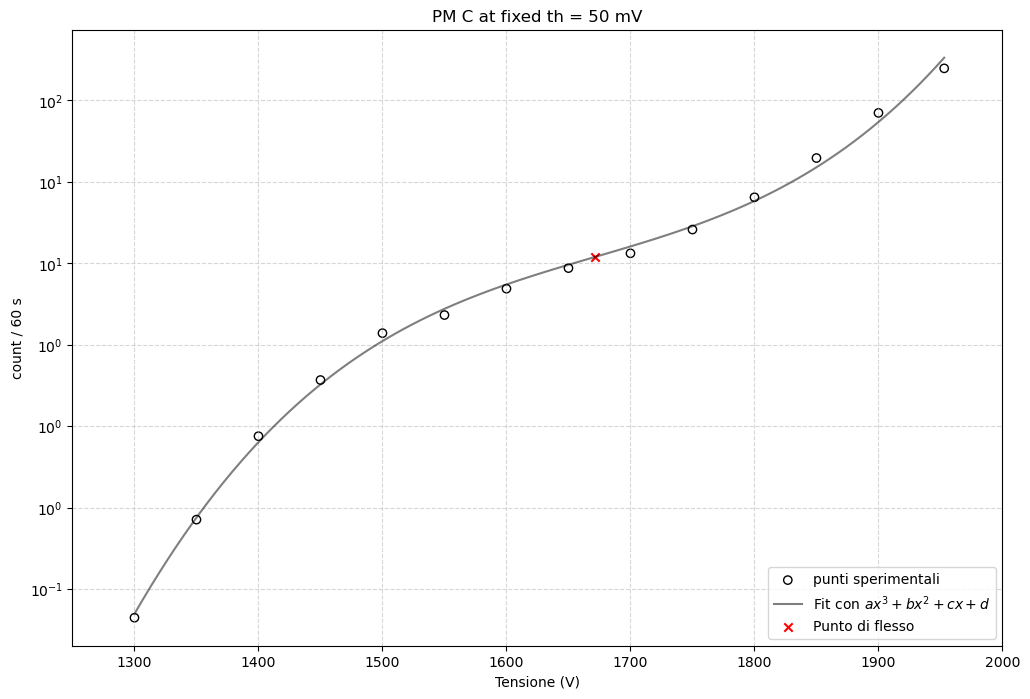

In [ ]:
from scipy.optimize import curve_fit
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import sympy as sp

# Definisco la funzione per calcolare i punti di flesso
def calcolo_flessi(popt):
    '''
    Questa funzione calcola i punti di flesso della funzione
    definita da un polinomio di terzo grado.

    Parametri:
    - popt: i parametri del polinomio di terzo grado
    (a, b, c, d) ottenuti dal fit.

    Restituisce:
    - flesso: il punto di flesso della funzione
    '''
    a, b, c, d = popt
    # Definisci la variabile e la funzione
    x = sp.Symbol('x')
    f = a * x**3 + b * x**2 + c * x + d

    # Calcola la derivata seconda
    f2 = sp.diff(f, x, 2)

    # Trova i punti in cui la derivata seconda è zero
    punti_flesso = sp.solve(f2, x)

    # Controlla il cambio di concavità
    flessi_veri = []
    for p in punti_flesso:
        sinistra = f2.subs(x, p - 0.1)
        destra = f2.subs(x, p + 0.1)
        if sinistra * destra < 0:
            flessi_veri.append(p)
    return flessi_veri[0]


# Definisco la funzione per formattare l'asse y
def _format_func(value, tick_number):
    return r'$10^{%d}$' % value


# Definisco la funzione per plottare
def Plateaux_plot(x, y, popt, function, flesso, 
                  plot_settings = {'title': None,
                                   'xlabel': None,
                                   'ylabel': None, 
                                   'xlim': None}):
    '''
    Questa funzione serve per fare il plot dei dati sperimentali

    Parametri:
    - tensione: lista di valori di tensione
    - count_rate: lista di valori di conteggi / tempo di acquisizione
    - popt: i parametri del polinomio di terzo grado
    - function: la funzione da plottare
    - flesso: il punto di flesso della funzione
    - plot_settings: dizionario con le impostazioni del plot
    (title, xlabel, ylabel, xlim)

    Restituisce:
    - None
    '''
    fig, ax = plt.subplots(figsize=(12, 8))
    x_for_plot = np.linspace(min(x), max(x), 100)   # i valori "continui" di tensione per plottare la funzione
    ax.scatter(x, y, marker='o', color='black', facecolor='none', label='punti sperimentali')   # dati sperimentali
    ax.plot(x_for_plot, function(x_for_plot, *popt), color='black', label='Fit con $ax^3 + bx^2 + cx +d$', alpha=0.5) # fit
    ax.scatter(flesso, function(flesso, *popt), color='red', marker='x', label='Punto di flesso')   # punto di flesso
    ax.set(**plot_settings)    # titolo e label
    plt.gca().yaxis.set_major_formatter(FuncFormatter(_format_func))   # formato asse y
    ax.grid(linestyle='--', alpha=0.5)  # griglia
    ax.legend(loc='lower right')    # legenda
    plt.show()  


# Definisco la funzione da fittare
def function(x, a, b, c, d):        
    return a * x**3 + b *x**2 + c * x + d
 
# Carico i dati
dataset = pd.read_csv('CRate_Tensione__PM_C__th_50mV.csv')

# Definisco i dati
xdata = dataset['tensione'][3:]
ydata = dataset['count_rate'][3:]

# rescaling to log10
ydata = np.log10(ydata)

# Fitting
popt, pcov = curve_fit(function, xdata, ydata)

# Calcolo i punti di flesso
flesso = calcolo_flessi(popt)

# Plotto i dati
Plateaux_plot(tensione=xdata, count_rate=ydata, popt=popt, function=function, flesso=flesso, 
              plot_settings = { 'title': 'PM C at fixed th = 50 mV',
                                'xlabel': 'Tensione (V)',
                                'ylabel': 'count / 60 s', 
                                'xlim': [1250, 2000] })

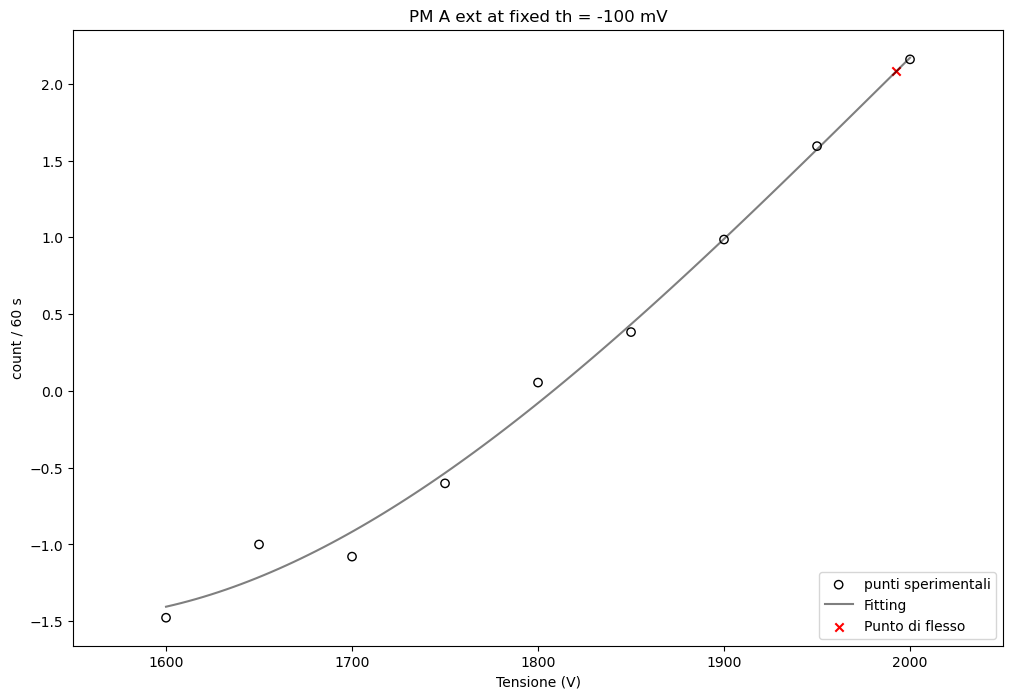

In [10]:
from scipy.optimize import curve_fit
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def calcolo_flessi(popt):
    a, b, c, d = popt
    # Definisci la variabile e la funzione
    x = sp.Symbol('x')
    f = a * x**3 + b * x**2 + c * x + d

    # Calcola la derivata seconda
    f2 = sp.diff(f, x, 2)

    # Trova i punti in cui la derivata seconda è zero
    punti_flesso = sp.solve(f2, x)

    # Controlla il cambio di concavità
    flessi_veri = []
    for p in punti_flesso:
        sinistra = f2.subs(x, p - 0.1)
        destra = f2.subs(x, p + 0.1)
        if sinistra * destra < 0:
            flessi_veri.append(p)
    return flessi_veri[0]

# Definisco la funzione per plottare
def Plateaux_plot(tensione, count_rate, xlim, popt, x_for_plot, function, flesso):
  '''
  Questa funzione serve per fare il plot dei dati sperimentali

  Parametri:
  - tensione: lista di valori di tensione
  - count_rate: lista di valori di conteggi / tempo di acquisizione
  - xlim: lista di due valori con i limiti da settare sull'asse delle x
  '''
  fig, ax = plt.subplots(figsize=(12, 8))
  x_for_plot = np.linspace(min(xdata), max(xdata), 100)
  ax.scatter(tensione, count_rate, marker='o', color='black', facecolor='none', label='punti sperimentali')
  ax.plot(x_for_plot, function(x_for_plot, *popt), color='black', label='Fitting', alpha=0.5)
  ax.scatter(flesso, function(flesso, *popt), color='red', marker='x', label='Punto di flesso')
  ax.set(title='PM A ext at fixed th = -100 mV', xlabel = 'Tensione (V)', ylabel= 'count / 60 s', xlim=xlim)
  ax.legend(loc='lower right')
  plt.show()

def function(x, a, b, c, d):
    return a * x**3 + b *x**2 + c * x + d
 
conteggi = [0, 0, 2, 6, 5, 15, 68, 145, 581, 2357, 8661]
tensione = [1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000]

count_rate = [v/60 for v in conteggi]

# Salvo i dati in csv
dataset = pd.DataFrame({'tensione': tensione, 'count_rate': count_rate})
dataset.to_csv('CRate_Tensione__PM_A_ext__th_100mV.csv')

ydata = count_rate[2:]
xdata = tensione[2:]

# rescaling to log10
ydata = np.log10(ydata)

# Fitting
popt, pcov = curve_fit(function, xdata, ydata)
a, b, c, d = popt

flesso = calcolo_flessi(popt)

Plateaux_plot(tensione=xdata, count_rate=ydata, xlim=[1550, 2050], popt=popt, x_for_plot=xdata, function=function, flesso=flesso)

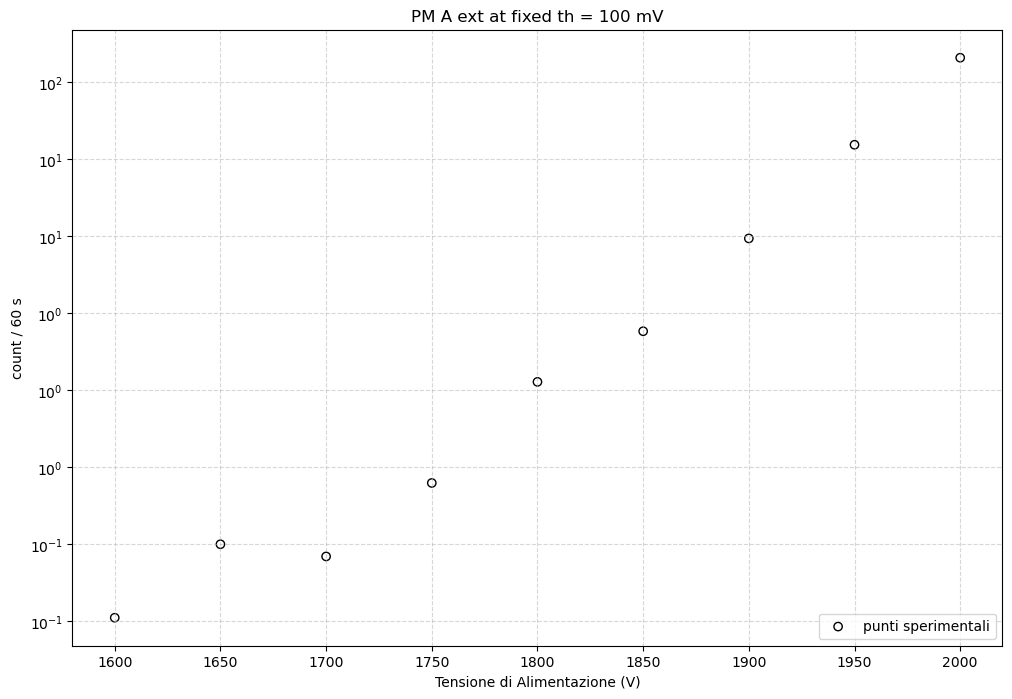

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from moduli import calcolo_flessi, Plateaux_plot

# Definisco la funzione da fittare
def function(x, a, b, c, d):        
    return a * x**3 + b *x**2 + c * x + d
 
# Carico i dati
dataset = pd.read_csv('CRate_Tensione__PM_A_ext__th_100mV.csv')

# Definisco i dati
xdata = dataset['tensione'][2:]
ydata = dataset['count_rate'][2:]

# rescaling to log10
ydata = np.log10(ydata)

# Plotto i dati
Plateaux_plot(x=xdata, y=ydata, bool_fit=False, bool_flesso=False, 
              plot_settings = { 'title': 'PM A ext at fixed th = 100 mV',
                                'xlabel': 'Tensione di Alimentazione (V)',
                                'ylabel': 'count / 60 s' })